<a href="https://colab.research.google.com/github/vishal77777/Tensorflow-Deep-learning/blob/main/Neural_network_classification_fashion_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This notebook covers:


1.   Architecture of classification nerual network

2. Input and output shapes of a classification problem(feature and labels)

3. Creating custom data to view and fit the model

4. creating,compiling,fitting,evaluating a model

5. different evaluation methods 

6. Saving and loading models






### What is classfication problem
Target variable in classification problems, unlike regression, is a categorical variable. In this we don’t try to predict the actual value of the target variable but try to assign it an appropriate category.

Types of classification algorithms:

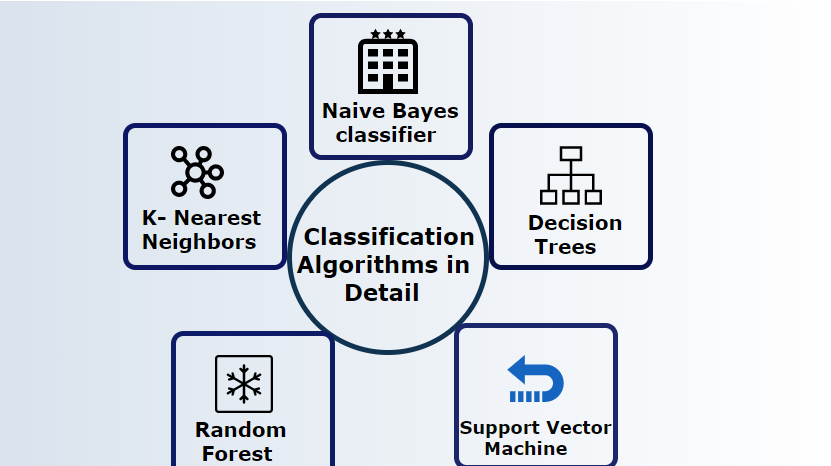

###Some Types Of CLassification Problems:
####1. Binary classification (Os,1s)

####2. Multiclass classification

####3.MultiLabel classification

## Multiclass vs Multilable Classification

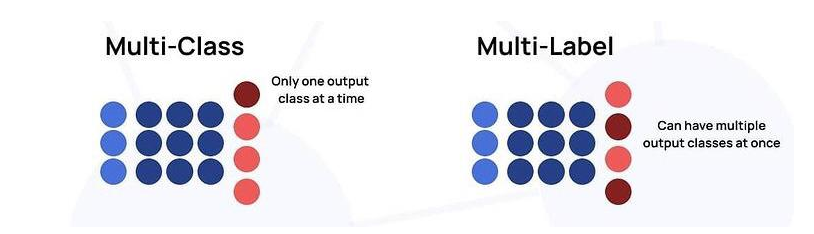

### Activation and loss function used in classification

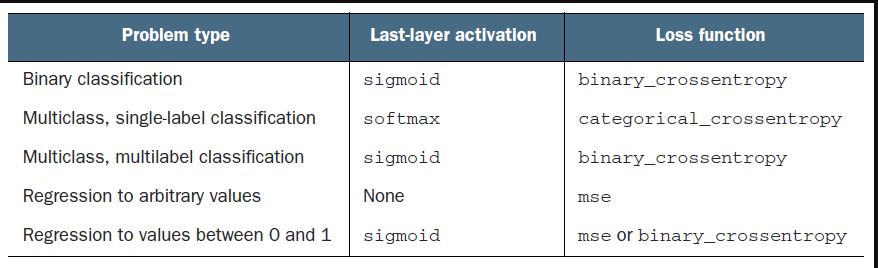

## Classification Inputs And Outputs

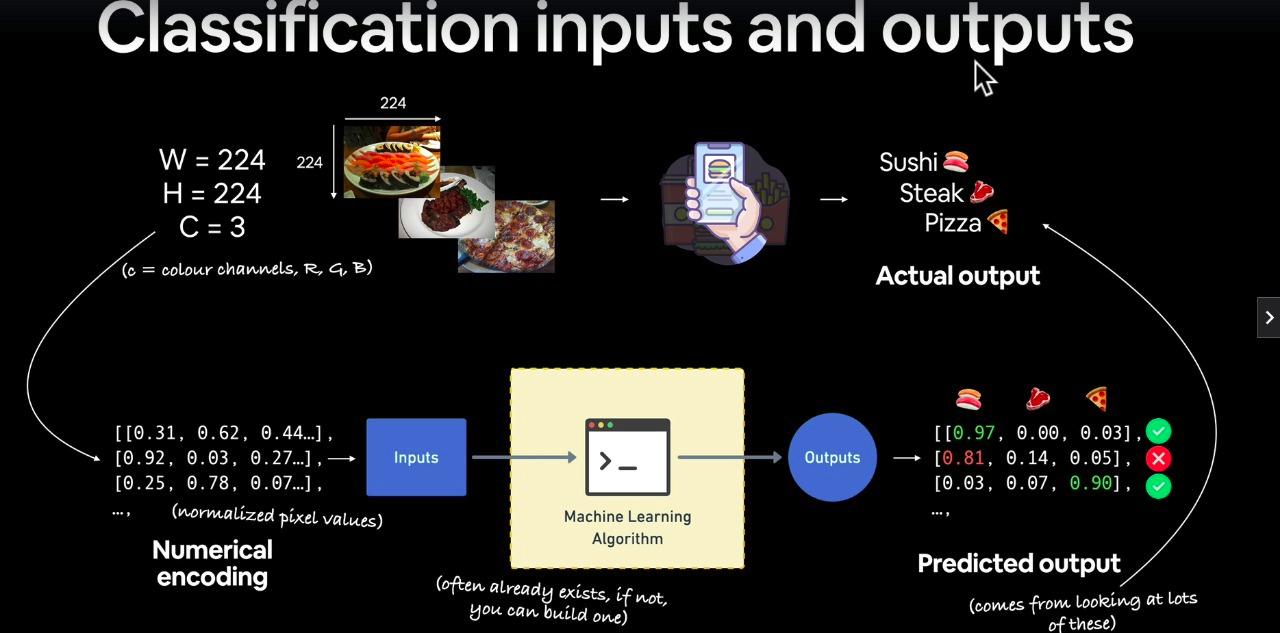

# HYPER PARAMETER

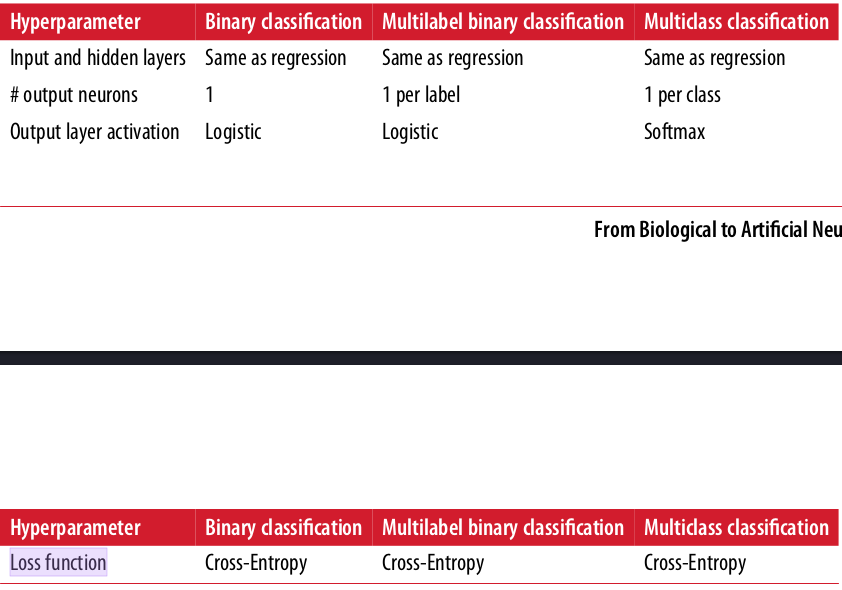

## Relu vs Sigmoid vs Softmax


***Relu:***

f(x)= returns max(0,x)

range(0,infinity)
____________________________________

***Sigmoid:***

f(x)= 1/ 1+pow(e,-x)

range(0,1)
_______________

***Softmax:***

list=[some numbers with indexes]

f(x)= pow(e,list)/ pow(e,sum(list))

range between 0 and 1 
_____________________________________


### Creatng data to view and fit

In [ ]:
# make 1000 examples

from sklearn.datasets import make_circles

n_samples=1000

# create circles
x,y=make_circles(n_samples,noise=0.03,random_state=42)

x[:10] , y[:10]
x.shape

(1000, 2)

In [ ]:
import pandas as pd

circles=pd.DataFrame({"x0":x[:,0], "x1":x[:,1],"label":y})
circles.head()

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


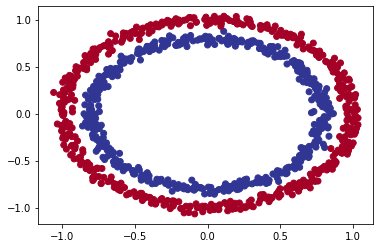

In [ ]:
#visualize it with a plot 
import matplotlib.pyplot as plt
plt.scatter(circles["x0"],circles["x1"],c=y,cmap=plt.cm.RdYlBu);

In [ ]:
import tensorflow as tf

In [ ]:
# Model creation


tf.random.set_seed(42)

model1= tf.keras.Sequential([
                             tf.keras.layers.Dense(1,input_shape=[2])
])

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# fit the model

model1.fit(x,y,epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4990
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4950
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4840
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4820


In [ ]:
# increase the epochs
model1.fit(x,y,epochs=200,verbose=0)

model1.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:
# improving our model by adding layers

tf.random.set_seed(42)
# Used callback to stop the epochs if accuracy not improving


model_2=tf.keras.Sequential([
                            
                            tf.keras.layers.Dense(10,input_shape=[x.shape[1]]),
                            tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
  
)


model_2.fit(x,y,epochs=200,verbose=1)

Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 0.7155 - accuracy: 0.4950
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7114 - accuracy: 0.4960
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7084 - accuracy: 0.4970
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7057 - accuracy: 0.4980
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7034 - accuracy: 0.4960
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.4950
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.4950
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.4980
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4950
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4950
Epoch 11/

In [ ]:
model_2.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931594014167786, 0.5]

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy 
from tensorflow.keras.optimizers import SGD,Adam

In [ ]:
# creating model_3
tf.random.set_seed(42)

model_3= Sequential([
                     Dense(100,input_shape=[2]),
                     Dense(10),
                     Dense(1)
])

model_3.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])


model_3.fit(x,y,epochs=100,verbose=0)

In [ ]:
model_3.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

In [ ]:
import numpy as np

In [ ]:
# plotting the predictions
def plot_predictions_boundary(model,x,y):
  """" Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlGn, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlGn)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classifcation...


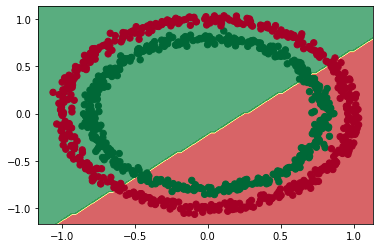

In [ ]:

#check the prediction boundary
plot_predictions_boundary(model_3,x,y) 

In [ ]:
tf.random.set_seed(42)

# create the model
model_4= Sequential([
                     
                  Dense(1,activation="linear")


])


model_4.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(learning_rate=0.001),
                metrics=["accuracy"])

history=model_4.fit(x,y,epochs=100)




Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

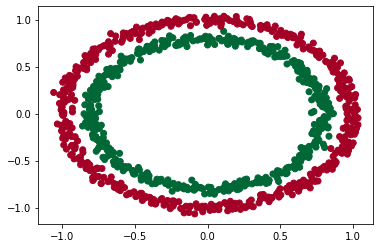

In [ ]:
# check out the evaluation metrics

plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlGn)


doing binary classifcation...


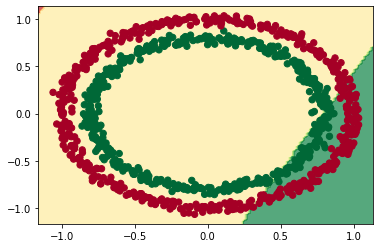

In [ ]:
# visualizing our model predictions
plot_predictions_boundary(model_4,x,y)

In [ ]:
# Model 5 with non linear activtion function in each layer and applying sigmoid function in the last layer to get a god result


tf.random.set_seed(42)


model_5= Sequential(
    [
     Dense(100),
     Dense(100,activation=tf.keras.activations.relu),
     Dense(1,activation="sigmoid")
     ])

model_5.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_5= model_5.fit(x,y,epochs=150)

Epoch 1/150
32/32 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5050
Epoch 2/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5460
Epoch 3/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.5880
Epoch 4/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.6520
Epoch 5/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.6410
Epoch 6/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.6750
Epoch 7/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6157 - accuracy: 0.7840
Epoch 8/150
32/32 [==============================] - 0s 3ms/step - loss: 0.5851 - accuracy: 0.8530
Epoch 9/150
32/32 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.8530
Epoch 10/150
32/32 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.9850
Epoch 11/

In [ ]:
model_5.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000


[0.00303556933067739, 1.0]

doing binary classifcation...


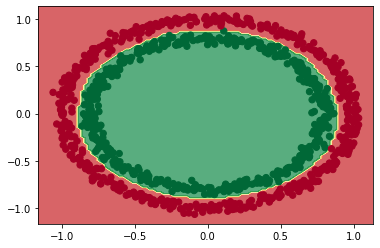

In [ ]:
plot_predictions_boundary(model_5,x,y)

([<matplotlib.lines.Line2D at 0x7f5294309c10>],
 [<matplotlib.lines.Line2D at 0x7f5293564990>])

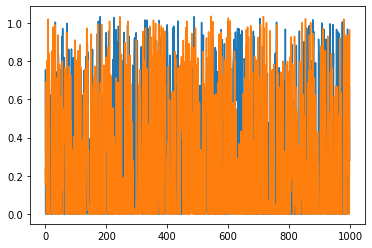

In [ ]:
# Visualize the activation functions 

plt.plot(tf.keras.activations.relu(x[:,0])),plt.plot(tf.keras.activations.relu(x[:,1]))

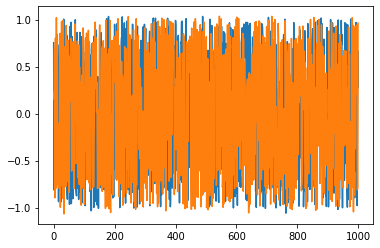

In [ ]:
plt.plot(tf.keras.activations.linear(x[:]))

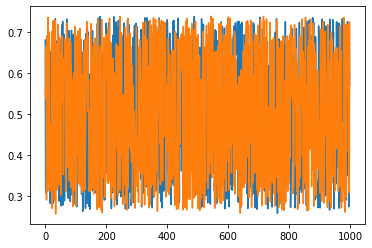

In [ ]:
plt.plot(tf.keras.activations.sigmoid(x[:]))

In [ ]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
## Creating model 6 with test and train data 

tf.random.set_seed(42)



model_6=Sequential([
                    Dense(100),
                    Dense(100,activation=tf.keras.activations.relu),
                    Dense(1,activation="sigmoid")
])


model_6.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(learning_rate=0.001),
                metrics=["accuracy"])



history_6=model_6.fit(x_train,y_train,epochs=150)

Epoch 1/150
25/25 [==============================] - 1s 3ms/step - loss: 0.6906 - accuracy: 0.5063
Epoch 2/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5550
Epoch 3/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6012
Epoch 4/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.6888
Epoch 5/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.6450
Epoch 6/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.7025
Epoch 7/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6238 - accuracy: 0.8150
Epoch 8/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.8687
Epoch 9/150
25/25 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.8263
Epoch 10/150
25/25 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.8250
Epoch 11/

In [ ]:
model_6.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 1.0000


[0.010332944802939892, 1.0]

doing binary classifcation...
doing binary classifcation...


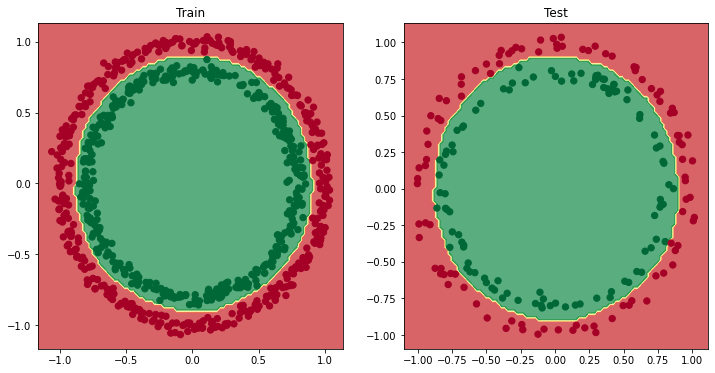

In [ ]:
# Plotting the testing and training data


y_pred_6=model_6.predict(x_test)


plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

plt.title("Train")

plot_predictions_boundary(model_6,x_train,y_train)
plt.subplot(1,2,2)

plt.title("Test")

plot_predictions_boundary(model_6,x_test,y_test)
plt.show();

In [ ]:
# Plot the loss curves 

history.history

pd.DataFrame(history.history)

,loss,accuracy
0,4.297891,0.467
1,4.231725,0.440
2,4.161002,0.431
3,4.118288,0.427
4,4.078447,0.424
...,...,...
95,3.329016,0.459
96,3.272706,0.460
97,3.263572,0.458
98,3.250923,0.457


plot the loss curves

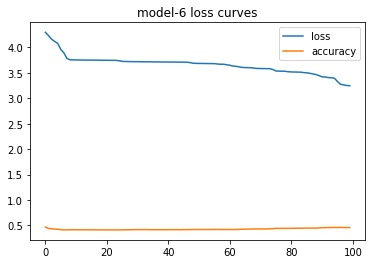

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("model-6 loss curves")
plt.legend();

# Finding the best learning_rate

1. learning_rate callback can be added to the model

2. Another model 

3. Modified loss curves plot

In [ ]:
x_train.shape

(800, 2)

In [ ]:
def lr_scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 90
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

In [ ]:
from os import name
tf.random.set_seed(42)

# Creating the model

model_7= Sequential([
                     Dense(100,input_shape=[x_train.shape[1]],activation=tf.keras.activations.relu,name="Input_layer"),
                     Dense(100,activation=tf.keras.activations.relu,name="Hidden_layer1"),
                     Dense(1,activation=tf.keras.activations.sigmoid,name="Output_layer")
                    ],name="Model_7")


model_7.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(lr=0.015),
                metrics=["accuracy"])

lr_call=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))


history_7= model_7.fit(x_train,y_train,epochs=25,
                       callbacks=[lr_call])

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4850 - lr: 1.0000e-04
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5100 - lr: 1.2589e-04
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 

In [ ]:
model_7.summary()

Model: "Model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 100)               300       
                                                                 
 Hidden_layer1 (Dense)       (None, 100)               10100     
                                                                 
 Output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10,501
Trainable params: 10,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_7.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1269 - accuracy: 1.0000


[0.1268720030784607, 1.0]

In [ ]:
model_6.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 1.0000


[0.010332944802939892, 1.0]

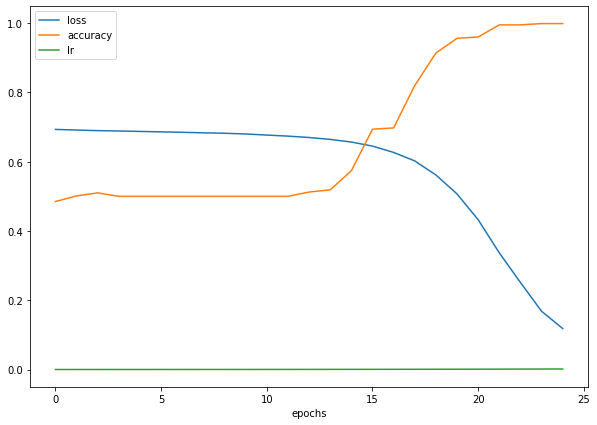

In [ ]:
# check the history for the model

pd.DataFrame(history_7.history).plot(figsize=(10,7),xlabel="epochs")

In [ ]:
lrs= 1e-4 * (10 ** (tf.range(25)/20))

Text(0.5, 1.0, 'Learning rate vs loss')

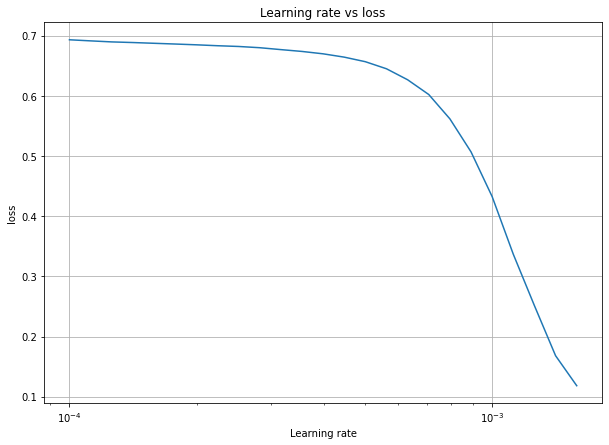

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_7.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.grid(True)
plt.title("Learning rate vs loss")
#plt.legend();

doing binary classifcation...
doing binary classifcation...


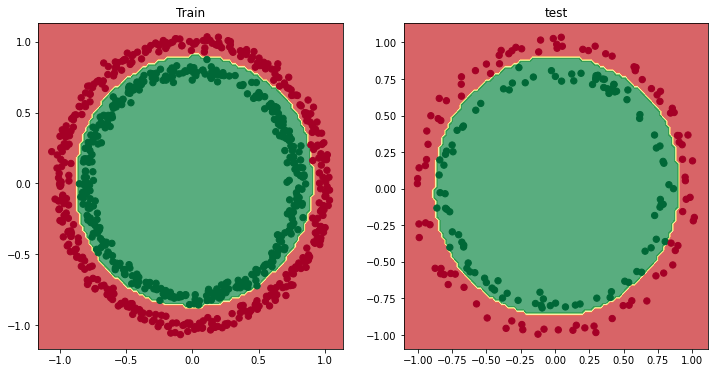

In [ ]:
# plot the decision boundaries
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")

plot_predictions_boundary(model_7,x_train,y_train)

plt.subplot(1,2,2)

plt.title("test")
plot_predictions_boundary(model_7,x_test,y_test)

plt.show()

Metrics For Evaluation

1. Accuracy

2. Precision

3. Recall

4. F1 - score

5. Confusion matrix

6. Classification report (sklearn)

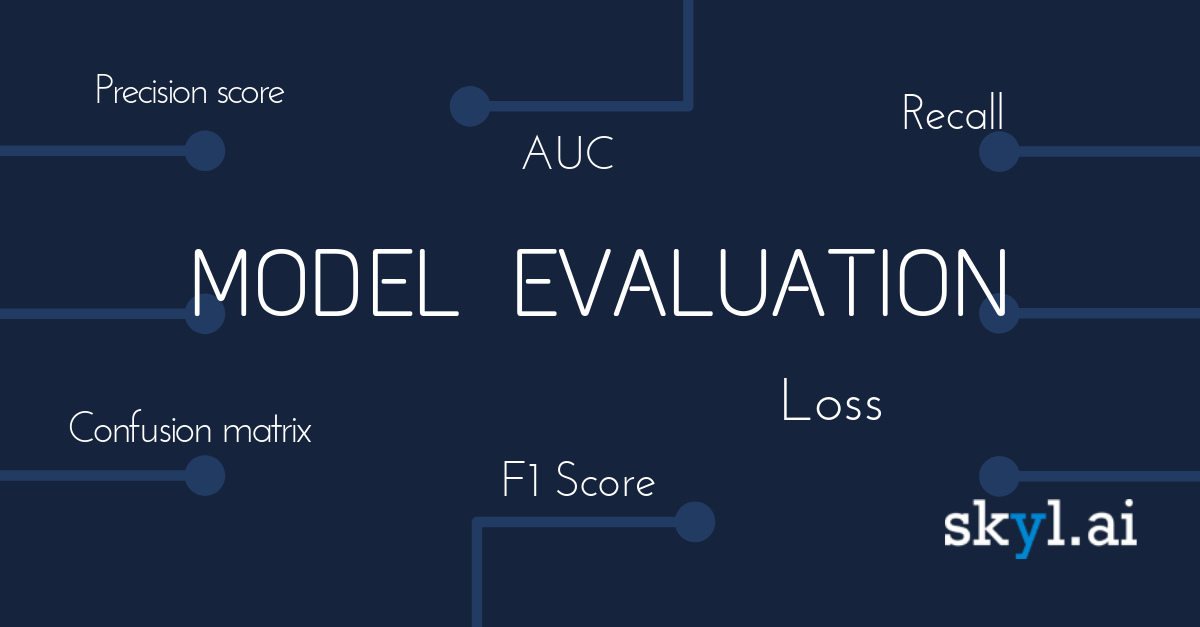


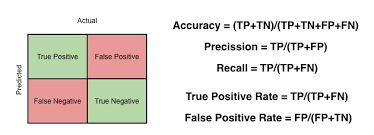



In [ ]:
# create a function to return loss,accuracy,recall,confusion matrix,f1-score
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,classification_report
def evaluation_metrics(x_test,y_test,model):

  y_pred=model.predict(x_test)
  cf_matrix = confusion_matrix(y_test,tf.round(y_pred))
  f1=f1_score(y_test,tf.round(y_pred))
  pr_score=precision_score(y_test,tf.round(y_pred))
  recall=recall_score(y_test,tf.round(y_pred))

  loss,accuracy=model.evaluate(x_test,y_test,verbose=0)
  data={"Model_Name":model.name,
        "Loss":[round(loss,3)],
        "Accuracy":[accuracy*100],
        "Recall":[recall],
        "Precision score":[pr_score],
        "F1-score":[f1],
        "Confusion Matrix":[cf_matrix]
        }
  
  evaluation=pd.DataFrame(data)
  



  return evaluation
  

In [ ]:
s=evaluation_metrics(x_test,y_test,model_7)
r=evaluation_metrics(x_test,y_test,model_6)

r.head()

,Model_Name,Loss,Accuracy,Recall,Precision score,F1-score,Confusion Matrix
0,sequential_5,0.01,100.0,1.0,1.0,1.0,"[[100, 0], [0, 100]]"


In [ ]:
s.head()

,Model_Name,Loss,Accuracy,Recall,Precision score,F1-score,Confusion Matrix
0,Model_7,0.127,100.0,1.0,1.0,1.0,"[[100, 0], [0, 100]]"


#Working with larger example (multiclass classification)

### If there is more than two class available in a data set it is multi class dataset


##### Neural network for fashiion_mnist dataset
 training = 60000 examples

 test     = 10000 examples


# Labels or classes


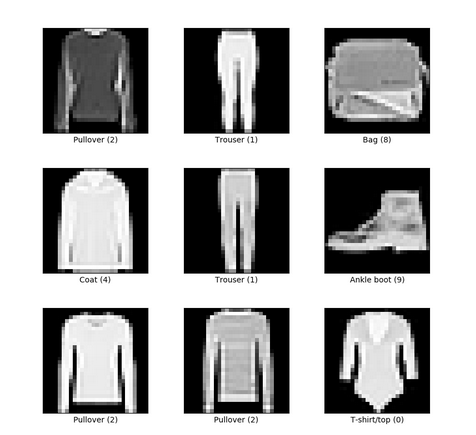

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# the data is already split

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

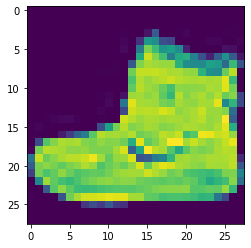

In [ ]:
# view a single sample
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
x_test[0]


In [ ]:
# check out sample label

class_name= ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_name)

10

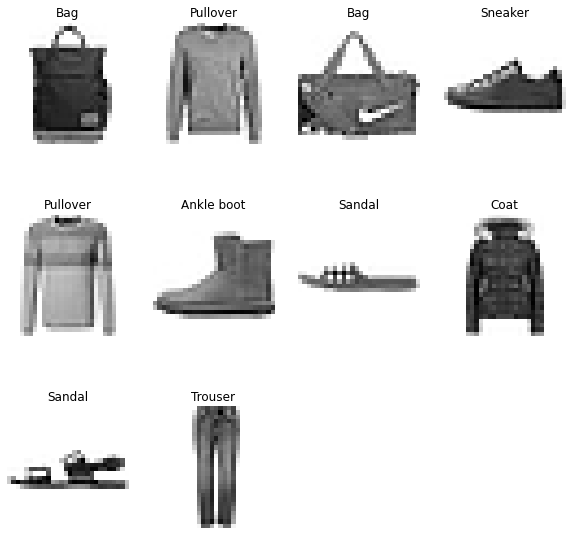

In [ ]:
import random 
plt.figure (figsize=(10,10))
for i in range(10):
  ax=plt.subplot(3,4,i+1)
  rand_index = random.choice(range(len(x_train)))
  plt.imshow(x_train[rand_index],cmap=plt.cm.binary)
  plt.title(class_name[y_train[rand_index]])
  plt.axis(False)


#### input shape = 28  x 28 

#### output shape= 10(one per class clothing)

#### loss = CategoricaCrossentropy (if not encoded SparseCategoricalCrossentropy)

#### function = Adam 

#### metrics = accuracy

#### hidden layer activation = relu or none

#### Output activation = softmax



In [ ]:
x_train.shape[1:]

(28, 28)

In [ ]:
from tensorflow.keras.layers import Flatten
# Set random seed 
# without normalizing of data
tf.random.set_seed(42)
# Flatten is used to convert multi dimensional array to 1d 
# create using sequential

mnistmodel_1= Sequential([
                        Flatten(input_shape=[28,28]),
                        Dense(100,name="input_layer"),
                        Dense(100,activation="relu",name="hidden_layer_1"),
                        
                        
                        Dense(10,activation="softmax",name="output-layer")

                      ],name="Fashion_mnist_1")

# compile the model

mnistmodel_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(lr=0.001),
                   metrics=["accuracy"])
# Fitting the model  
history_mnist_1= mnistmodel_1.fit(x_train,
                            y_train,
                              epochs=10,
                              validation_data=(x_test,y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 7s 4ms/step - loss: 3.3699 - accuracy: 0.6583 - val_loss: 0.9457 - val_accuracy: 0.6162
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7432 - accuracy: 0.7172 - val_loss: 0.6705 - val_accuracy: 0.7350
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6790 - accuracy: 0.7547 - val_loss: 0.7635 - val_accuracy: 0.7438
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6382 - accuracy: 0.7788 - val_loss: 0.6454 - val_accuracy: 0.8000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6567 - accuracy: 0.7771 - val_loss: 0.7035 - val_accuracy: 0.7701
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6602 - accuracy: 0.7783 - val_loss: 0.7077 - val_accuracy: 0.7677
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6306 - accuracy: 0.7897 - val_loss: 0.6252 - val_accuracy: 0.7964
Epo

In [ ]:
x_train_norm=x_train/255.0
x_test_norm=x_test/255.0

In [ ]:
from tensorflow.keras.layers import Flatten
# Set random seed 
# after normalizing the data
tf.random.set_seed(42)
# Flatten is used to convert multi dimensional array to 1d 
# create using sequential

mnistmodel_2= Sequential([
                        Flatten(input_shape=[28,28]),
                        Dense(100,name="input_layer"),
                        Dense(100,activation="relu",name="hidden_layer_1"),
                        
                        
                        Dense(10,activation="softmax",name="output-layer")

                      ],name="Fashion_mnist_2")

# compile the model

mnistmodel_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(lr=0.001),
                   metrics=["accuracy"])
# Fitting the model  
history_mnist_2= mnistmodel_2.fit(x_train_norm,
                            y_train,
                              epochs=10,
                              validation_data=(x_test_norm,y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 6s 3ms/step - loss: 0.4945 - accuracy: 0.8236 - val_loss: 0.4245 - val_accuracy: 0.8461
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3786 - accuracy: 0.8627 - val_loss: 0.4631 - val_accuracy: 0.8438
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3468 - accuracy: 0.8728 - val_loss: 0.3975 - val_accuracy: 0.8556
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3260 - accuracy: 0.8801 - val_loss: 0.3896 - val_accuracy: 0.8598
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3105 - accuracy: 0.8856 - val_loss: 0.3658 - val_accuracy: 0.8661
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2985 - accuracy: 0.8892 - val_loss: 0.4036 - val_accuracy: 0.8471
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2903 - accuracy: 0.8918 - val_loss: 0.3927 - val_accuracy: 0.8627
Epo

In [ ]:
mnistmodel_1.summary(),mnistmodel_2.summary()

Model: "Fashion_mnist_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 input_layer (Dense)         (None, 100)               78500     
                                                                 
 hidden_layer_1 (Dense)      (None, 100)               10100     
                                                                 
 output-layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Model: "Fashion_mnist_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)  

(None, None)

In [ ]:
mnistmodel_1.evaluate(x_test,y_test),    mnistmodel_2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 82.2083 - accuracy: 0.8295


([0.6792360544204712, 0.7814000248908997],
 [82.20826721191406, 0.8295000195503235])

In [ ]:
y_pred_mnist_1=mnistmodel_1.predict(x_test_norm)
y_pred_mnist_2=mnistmodel_2.predict(x_test_norm)

y_pred_mnist_1.shape,y_pred_mnist_2.shape,y_test.shape,y_train.shape

((10000, 10), (10000, 10), (10000,), (60000,))

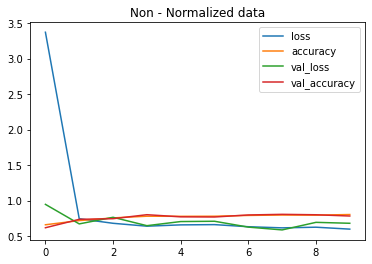

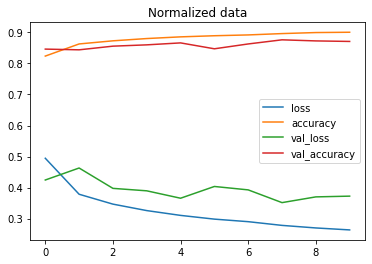

In [ ]:
# plotting the normalized vs non-normalized data loss curves

pd.DataFrame(history_mnist_1.history).plot(title="Non - Normalized data")

pd.DataFrame(history_mnist_2.history).plot(title="Normalized data")

Use Callbacks For Ideal Learning Rate

In [ ]:
from tensorflow.keras.layers import Flatten
# Set random seed 
# after normalizing the data
tf.random.set_seed(42)
# Flatten is used to convert multi dimensional array to 1d 
# create using sequential
lr_call=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))
mnistmodel_3= Sequential([
                        Flatten(input_shape=[28,28]),
                        Dense(100,name="input_layer"),
                        Dense(100,activation="relu",name="hidden_layer_1"),
                        
                        
                        Dense(10,activation="softmax",name="output-layer")

                      ],name="Fashion_mnist_3")

# compile the model

mnistmodel_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(lr=0.001),
                   metrics=["accuracy"])
# Fitting the model  
history_mnist_3= mnistmodel_3.fit(x_train_norm,
                            y_train,
                              epochs=40,
                              validation_data=(x_test_norm,y_test),
                              callbacks=[lr_call])

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 6s 3ms/step - loss: 0.4945 - accuracy: 0.8236 - val_loss: 0.4245 - val_accuracy: 0.8461 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3855 - accuracy: 0.8597 - val_loss: 0.4393 - val_accuracy: 0.8462 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3580 - accuracy: 0.8692 - val_loss: 0.3998 - val_accuracy: 0.8529 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3476 - accuracy: 0.8733 - val_loss: 0.4460 - val_accuracy: 0.8460 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3394 - accuracy: 0.8743 - val_loss: 0.3945 - val_accuracy: 0.8566 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3347 - accuracy: 0.8776 - val_loss: 0.4651 - val_accuracy: 0.8357 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step -

Text(0.5, 1.0, 'Finding the ideal learning rate')

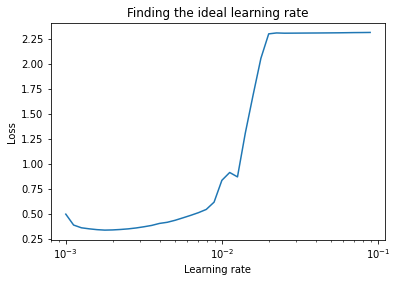

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
lrs=1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,history_mnist_3.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix



In [ ]:
### Evaluating the MOdel Peerformance on mnist_dataset



y_pred_mnist_3=mnistmodel_3.predict(x_test_norm)

#IC = type('IdentityClassifier', (), {"predict": lambda i : i, "_estimator_type": "classifier"})
#plot_confusion_matrix(IC, y_pred_mnist_3, y_test, normalize='true', values_format='.2%');



## Mnist Model 2 is performing better than the Mnist Model 3 

In [ ]:
 import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

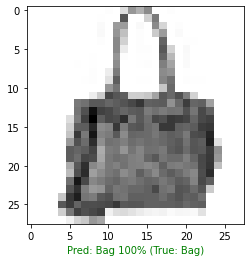

In [142]:
plot_random_image(model=mnistmodel_2,
                   images=x_test_norm,
                   true_labels=y_test,
                   classes=class_name)

Model: "Fashion_mnist_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 input_layer (Dense)         (None, 100)               78500     
                                                                 
 hidden_layer_1 (Dense)      (None, 100)               10100     
                                                                 
 output-layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


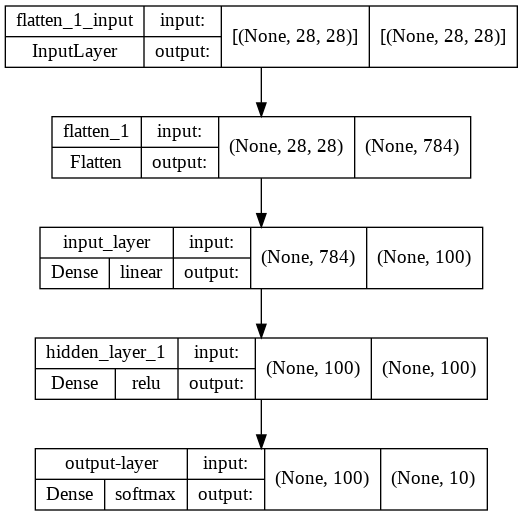

In [145]:
from tensorflow.keras.utils import plot_model


# See the inputs and no of params per layer
mnistmodel_2.summary()

plot_model(mnistmodel_2,show_layer_activations=True,show_shapes=True)

### Saving the Model

In [148]:
tf.saved_model.save(mnistmodel_2, "/content/drive/MyDrive/ColabNotebooks/Tensorflow_models_notebooks/")



INFO:tensorflow:Assets written to: /content/drive/MyDrive/ColabNotebooks/Tensorflow_models_notebooks/assets


In [149]:
mnistmodel_2.save("Mnist Model.h5","/content/drive/MyDrive/ColabNotebooks/Tensorflow_models_notebooks/")